<a href="https://colab.research.google.com/github/Rubiknow/2021-2022-FPL-Players-Analysis/blob/main/FPL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BRIEF FPL ANALYSIS

The Fantasy Premier League (FPL) over the years has become an exciting way fans get to experience and engage 
with the English Premier League (EPL), its players and their favorite clubs in the league.

I personally joined the FPL in 2016/2017 season, at first passively, joining a private league with cash prize 
incentives, made me even more competitive and pay more attention to events that I previously wouldn’t care for 
during the course of the season.

For the 2020/2021 season, I finished in the top 3 positions in 3 private leagues, with a total of 2,291 points,  
I averaged a Gameweek score of 65 points and ranked 403,335 which is in the top 5% of all FPL managers.

The 2021/2022 season was sort of a diaster for me, my total points went down by 14.2% to 1966, averaging 51 points per game week

The new EPL season commences on the 5th of July 2022, less than 2 days away effectively kicking off the new FPL season. In hope to perform better than last season, I have been doing some research have found many great tips out there such; how to rank players using value index, how to distribute your budget and what to look out for during the course of the season, when and how to use chips amongst others.

While looking into this, I decided to do a brief analysis of last season players and team performance in anticipation for the next season. For this project I used Python package and Google Colab, to briefly gain an insight and visualize player performances and some key indices of EPL players in the last FPL season.


# TABLE OF CONTENT

### 1. Importing Library and Data
### 2. Data Cleaning
### 3. Exploratory Data Analysis
### 4. Key Points
### 5. Conclusion
### 6. Brief

# 1. Importing Library and Data
### 1.1 Importing Libraries

In [ ]:
#To request for our data from the source.
import requests

#For data cleaning, exploration, and analysis.
import pandas as pd
import numpy as np

#For data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

### 1.2 Importing Data

### 1.2 Importing Data

In [ ]:
# We need the API
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

# we use the request module to interact with our API and make a GET request
# we transform our GET request into a JSON oject

file = requests.get(url)
file_json = file.json()

file_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

### 1.3 Create Data Frame from JSON

In [ ]:
#Use the key from from the JSON file to create dataframes

elements_df = pd.DataFrame(file_json['elements'])
elements_types_df = pd.DataFrame(file_json['element_types'])
team = pd.DataFrame(file_json['teams'])

team.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

In [ ]:
#Select target column
fpl_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','bonus','bps','minutes','value_season',
                      'total_points','creativity','points_per_game','now_cost' ]]

# 2. Data Cleaning

In [ ]:
fpl_df.head()

,first_name,second_name,team,element_type,selected_by_percent,bonus,bps,minutes,value_season,total_points,creativity,points_per_game,now_cost
0,Cédric,Alves Soares,1,2,0.3,0,0,0,0.0,0,0.0,0.0,45
1,Granit,Xhaka,1,3,0.7,0,12,90,0.4,2,15.0,2.0,50
2,Mohamed,Elneny,1,3,1.1,0,0,0,0.0,0,0.0,0.0,45
3,Rob,Holding,1,2,0.2,0,0,0,0.0,0,0.0,0.0,45
4,Thomas,Partey,1,3,0.6,0,17,90,0.6,3,12.9,3.0,50


### 2.1 Data description

In [ ]:
# Lets quicly see the content of our df
print(f'Data contain {fpl_df.shape[0]} records and {fpl_df.shape[1]} columns.')

Data contain 573 records and 13 columns.


### 2.2 Mapping of Columns to Club and Position

In [ ]:
# if we look at the data, the team (club) and element_type(position) of the players are keys to another table,
# so we will be mapping the players to their position and clubs

fpl_df['position'] = fpl_df.element_type.map(elements_types_df.set_index('id').singular_name)
fpl_df['club'] = fpl_df.team.map(team.set_index('id').name)


In [ ]:
fpl_df.head()

,first_name,second_name,team,element_type,selected_by_percent,bonus,bps,minutes,value_season,total_points,creativity,points_per_game,now_cost,position,club
0,Cédric,Alves Soares,1,2,0.3,0,0,0,0.0,0,0.0,0.0,45,Defender,Arsenal
1,Granit,Xhaka,1,3,0.7,0,12,90,0.4,2,15.0,2.0,50,Midfielder,Arsenal
2,Mohamed,Elneny,1,3,1.1,0,0,0,0.0,0,0.0,0.0,45,Midfielder,Arsenal
3,Rob,Holding,1,2,0.2,0,0,0,0.0,0,0.0,0.0,45,Defender,Arsenal
4,Thomas,Partey,1,3,0.6,0,17,90,0.6,3,12.9,3.0,50,Midfielder,Arsenal


### 2.3 Dropping Unwanted Columns

In [ ]:
# Lets drop our key columns

fpl_df.drop(['element_type','team'],axis = 1, inplace = True)

### 2.4 Merge first_name and last_name columns

In [ ]:
# Some players may have similar first name or last name, merging the first and last name, will create a unique name value
#Lets check the data type for the name columns
type(fpl_df)
fpl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   first_name           573 non-null    object
 1   second_name          573 non-null    object
 2   selected_by_percent  573 non-null    object
 3   bonus                573 non-null    int64 
 4   bps                  573 non-null    int64 
 5   minutes              573 non-null    int64 
 6   value_season         573 non-null    object
 7   total_points         573 non-null    int64 
 8   creativity           573 non-null    object
 9   points_per_game      573 non-null    object
 10  now_cost             573 non-null    int64 
 11  position             573 non-null    object
 12  club                 573 non-null    object
dtypes: int64(5), object(8)
memory usage: 58.3+ KB


In [ ]:
# Both columns are object types so we can merge them
fpl_df['name'] = fpl_df['first_name'] + ' ' +fpl_df['second_name']
fpl_df.head()

,first_name,second_name,selected_by_percent,bonus,bps,minutes,value_season,total_points,creativity,points_per_game,now_cost,position,club,name
0,Cédric,Alves Soares,0.3,0,0,0,0.0,0,0.0,0.0,45,Defender,Arsenal,Cédric Alves Soares
1,Granit,Xhaka,0.7,0,12,90,0.4,2,15.0,2.0,50,Midfielder,Arsenal,Granit Xhaka
2,Mohamed,Elneny,1.1,0,0,0,0.0,0,0.0,0.0,45,Midfielder,Arsenal,Mohamed Elneny
3,Rob,Holding,0.2,0,0,0,0.0,0,0.0,0.0,45,Defender,Arsenal,Rob Holding
4,Thomas,Partey,0.6,0,17,90,0.6,3,12.9,3.0,50,Midfielder,Arsenal,Thomas Partey


In [ ]:
# Drop the first name and second name column
fpl_df = fpl_df.drop(['first_name','second_name','value_season'], axis = 1)

In [ ]:
fpl_df.head()

,selected_by_percent,bonus,bps,minutes,total_points,creativity,points_per_game,now_cost,position,club,name
0,0.3,0,0,0,0,0.0,0.0,45,Defender,Arsenal,Cédric Alves Soares
1,0.7,0,12,90,2,15.0,2.0,50,Midfielder,Arsenal,Granit Xhaka
2,1.1,0,0,0,0,0.0,0.0,45,Midfielder,Arsenal,Mohamed Elneny
3,0.2,0,0,0,0,0.0,0.0,45,Defender,Arsenal,Rob Holding
4,0.6,0,17,90,3,12.9,3.0,50,Midfielder,Arsenal,Thomas Partey


In [ ]:
fpl_df.dtypes

selected_by_percent    object
bonus                   int64
bps                     int64
minutes                 int64
total_points            int64
creativity             object
points_per_game        object
now_cost                int64
position               object
club                   object
name                   object
dtype: object

### 2.5 Change column datatype

In [ ]:
fpl_df.iloc[:,0:8] = fpl_df.iloc[:,0:8].astype('float')

In [ ]:
fpl_df.dtypes

selected_by_percent    float64
bonus                  float64
bps                    float64
minutes                float64
total_points           float64
creativity             float64
points_per_game        float64
now_cost               float64
position                object
club                    object
name                    object
dtype: object

### 2.6 Check for misssing Data

In [ ]:
fpl_df.isnull().sum()

selected_by_percent    0
bonus                  0
bps                    0
minutes                0
total_points           0
creativity             0
points_per_game        0
now_cost               0
position               0
club                   0
name                   0
dtype: int64

### 2.7 Data Summary

In [ ]:
# Lets see the statistical summary for the columns of our dataset
fpl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
selected_by_percent,573.0,2.616056,7.082530,0.0,0.1,0.4,1.5,73.8
bonus,573.0,0.108202,0.489918,0.0,0.0,0.0,0.0,3.0
bps,573.0,6.356021,9.501690,-5.0,0.0,1.0,11.0,57.0
minutes,573.0,34.469459,40.862183,0.0,0.0,1.0,90.0,90.0
total_points,573.0,1.375218,2.460289,-2.0,0.0,0.0,2.0,15.0
creativity,573.0,5.146946,10.742033,0.0,0.0,0.0,3.4,78.8
points_per_game,573.0,1.375218,2.460289,-2.0,0.0,0.0,2.0,15.0
now_cost,573.0,51.012216,11.919230,40.0,45.0,45.0,55.0,130.0


In [ ]:
fpl_df.describe(include='object').T

,count,unique,top,freq
position,573,4,Midfielder,248
club,573,20,Spurs,33
name,573,572,Ben Davies,2


In [ ]:
fpl_df['club'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leicester',
       'Leeds', 'Liverpool', 'Man City', 'Man Utd', 'Newcastle',
       "Nott'm Forest", 'Southampton', 'Spurs', 'West Ham', 'Wolves'],
      dtype=object)

### 2.8. Dropping Players with Zero minutes
Apparently this is a recent dataset from FPL and it has been updated to reflect teams and players that recently got promoted to the EPL as well as newly transferred.
So for the sake of this analysis, we will only be, using the data of players that played over 0 minutes in the league, last season and are still in the EPL this season.

In [ ]:
# Drop players with zero minutes played 
fpl_df=fpl_df.loc[fpl_df.minutes>0]

In [ ]:
fpl_df.head()

,selected_by_percent,bonus,bps,minutes,total_points,creativity,points_per_game,now_cost,position,club,name
1,0.7,0.0,12.0,90.0,2.0,15.0,2.0,50.0,Midfielder,Arsenal,Granit Xhaka
4,0.6,0.0,17.0,90.0,3.0,12.9,3.0,50.0,Midfielder,Arsenal,Thomas Partey
5,14.0,0.0,9.0,90.0,3.0,8.3,3.0,65.0,Midfielder,Arsenal,Martin Ødegaard
6,1.2,0.0,3.0,7.0,1.0,0.2,1.0,50.0,Defender,Arsenal,Kieran Tierney
8,6.6,0.0,25.0,90.0,5.0,12.0,5.0,45.0,Defender,Arsenal,Benjamin White


In [ ]:
print(f'Data contain {fpl_df.shape[0]} records and {fpl_df.shape[1]} columns.')


Data contain 297 records and 11 columns.


From 536 records to 390, whew!! thats alot, imagine how that would have affected the mean.

In [ ]:
fpl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
selected_by_percent,297.0,4.543771,9.364779,0.0,0.3,1.1,4.2,73.8
bonus,297.0,0.208754,0.665403,0.0,0.0,0.0,0.0,3.0
bps,297.0,12.262626,10.089049,-5.0,4.0,10.0,18.0,57.0
minutes,297.0,66.501684,33.003391,1.0,45.0,90.0,90.0,90.0
total_points,297.0,2.653199,2.880080,-2.0,1.0,2.0,3.0,15.0
creativity,297.0,9.929966,13.241229,0.0,0.5,3.1,15.8,78.8
points_per_game,297.0,2.653199,2.880080,-2.0,1.0,2.0,3.0,15.0
now_cost,297.0,54.898990,13.846037,40.0,45.0,50.0,55.0,130.0


In [ ]:
fpl_df.describe(include='object').T

,count,unique,top,freq
position,297,4,Midfielder,141
club,297,20,Newcastle,16
name,297,297,Granit Xhaka,1


### Variable description 

Selected by percent: Player ownership percentage.

**Bonus**: Bonus points.

**BPS**: Bonus Points System.

**Minutes**: Minuutes played.

**Total points**: Total points recieved.

**Creativity**: Player performance in terms of producing goalscoring opportunities for others.

**Points per game**: Average points recieved per games.

**Now Cost** : Current Price of player

**Position**: Player position.

**Club**: Player Club

**Name**: Players Name

# 3. Exploratory Data Analysis

In [ ]:
fpl_df.head()

,selected_by_percent,bonus,bps,minutes,total_points,creativity,points_per_game,now_cost,position,club,name
1,0.7,0.0,12.0,90.0,2.0,15.0,2.0,50.0,Midfielder,Arsenal,Granit Xhaka
4,0.6,0.0,17.0,90.0,3.0,12.9,3.0,50.0,Midfielder,Arsenal,Thomas Partey
5,14.0,0.0,9.0,90.0,3.0,8.3,3.0,65.0,Midfielder,Arsenal,Martin Ødegaard
6,1.2,0.0,3.0,7.0,1.0,0.2,1.0,50.0,Defender,Arsenal,Kieran Tierney
8,6.6,0.0,25.0,90.0,5.0,12.0,5.0,45.0,Defender,Arsenal,Benjamin White


In [ ]:
type(fpl_df)

pandas.core.frame.DataFrame

### 3.1 Top FPL players points

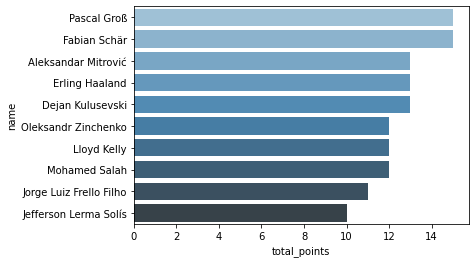

In [ ]:
sns.barplot(data=fpl_df.nlargest(10, 'total_points').sort_values(by='total_points', ascending=False) ,
            x="total_points", y="name",  palette="Blues_d")

### 3.2 Top 10 FPL Players Point Per Game

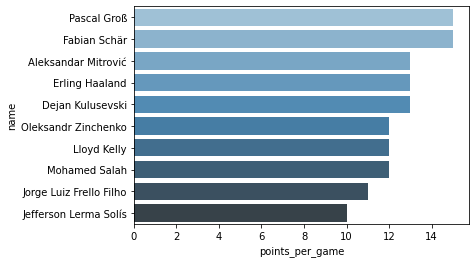

In [ ]:
sns.barplot(data=fpl_df.nlargest(10, 'points_per_game').sort_values (by = 'points_per_game', ascending = False), 
            x="points_per_game", y="name",  palette="Blues_d")

### 3.3 Top 20 FPL Players by Minutes played

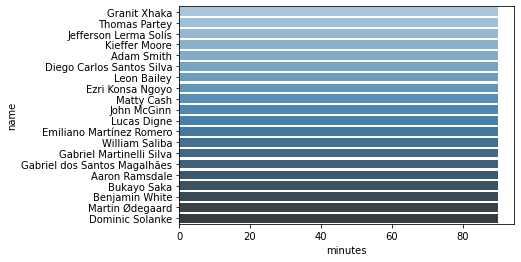

In [ ]:
sns.barplot(data=fpl_df.nlargest(20, 'minutes').sort_values (by = 'minutes', ascending = False), 
            x="minutes", y="name",  palette="Blues_d")

### 3.4 Total Points distrubution using Histogram

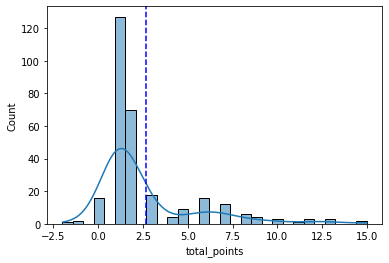

In [ ]:
sns.histplot(fpl_df['total_points'], kde = True)
plt.axvline(fpl_df['total_points'].mean(), color='blue', ls = '--',linewidth=1.5)

### 3.5 Total points by Position

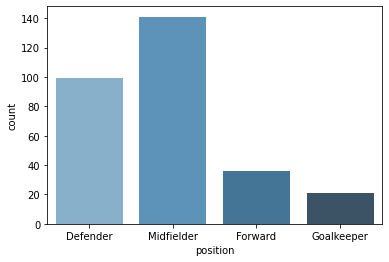

In [ ]:
sns.countplot(data = fpl_df.sort_values(by='total_points', ascending=False), x = 'position',palette="Blues_d")

### 3.6 Top 20 Creative Players

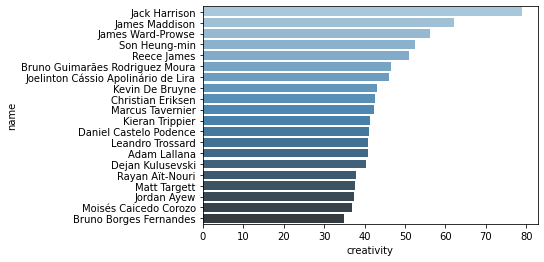

In [ ]:
sns.barplot(data=fpl_df.nlargest(20, 'creativity').sort_values (by = 'creativity', ascending = False), 
            x="creativity", y="name",  palette="Blues_d")

### 3.7 Heatmap showing correlation

### 3.8 Pairplot showing 

In [ ]:
sns.pairplot(fpl_df)

In [ ]:
fpl_df.head()

In [ ]:
### Export Data to Tableau for visualisation and Report
fpl_df.to_excel('FPL_Tableau_Final_File.xlsx', encoding='utf-8-sig', index=False)

# 4. Key Points
•The initial dataset had 20 clubs but didn’t feature clubs that were relegated last season (Burnley, Norwich and Watford). It included newly promoted clubs, N.tham Forest, Bournemouth and Fulham.

• Players with 0 minutes played were dropped for this project. This include players who just tranferred to EPL clubs, loanees return to EPL parent club from other leagues, players with newly promoted clubs.

#5. Summary
• Chelsea FC players, returned the highest point total for any club in the last season with a 
total of 2143 points.

• Manchester City had the best average point per team 99.16, closely followed by Liverpool. Talk about effective!!

• Manchester City is also the team with the most creativity or you can say with the most creative players,
followed by Liverpool. Chelsea and Arsenal round up the top 4 for creativity.

• Alisson Becker of Liverpool was the best shot stopper in FPL last season with 176 points, 
only Zack Steffen averaged better point per game than him (7.0). 

• Trent Alexander-Arnold earned the highest points among all defenders last season a total of 208 FPL points,
intrestingly 4 liverpool defenders make it into the top 10 defenders list, Talk about a must have. Only Ben Chilwell had a better points return per game of 7.9 before his injury Take note of him guys!!

• The defense will be an interesting position to look at next season as it also returned the lowest averaged point among all positions (62.83). You dont want to spend so much and get little returns.

• Last season saw two Midfielders clinch the golden boot (Salah and Son) with 23 goals, its no surprise they are the top 2 FPL players coming into this season. Salah with 265, Son with 258, are finished top 2
points returned per games as well.

• The Forward position on the other hand is an intresting position. Only 1 striker (Harry Kane) made it into the top 10 total points, but the position returned the Highest averaged points among all with 76.59. 

• Harry Kane finished top with 192 total points for the season, 
averaging 5.2 points per game. Jamie Vardy 5.3 and C.Ronaldo 5.3 returned better points per game. This position only got more competitive with the likes of Earling Haaland and Darwin Nunez joining the league 

# Conclusion

In all this, I am reminded of a quote by the famous Grand Chess Master and FPL enthusiast, Magnus Carlsen, “Even if you are good, you also need to be extraordinarily fortunate to be first overall”. I have found this to be true luck has a big part to play in your success as an FPL manager, but the ability to consume and process data just as well as been a fan of the sport comes in handy in decision making.